In [4]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa.util
from sklearn.model_selection import train_test_split

In [5]:
metadata = pd.read_csv("data/UrbanSound8K.csv")

In [5]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [6]:
class_frequency = metadata['class'].value_counts()
print(class_frequency)

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


In [7]:
metadata.drop(columns=['fsID','start','end'],inplace=True)

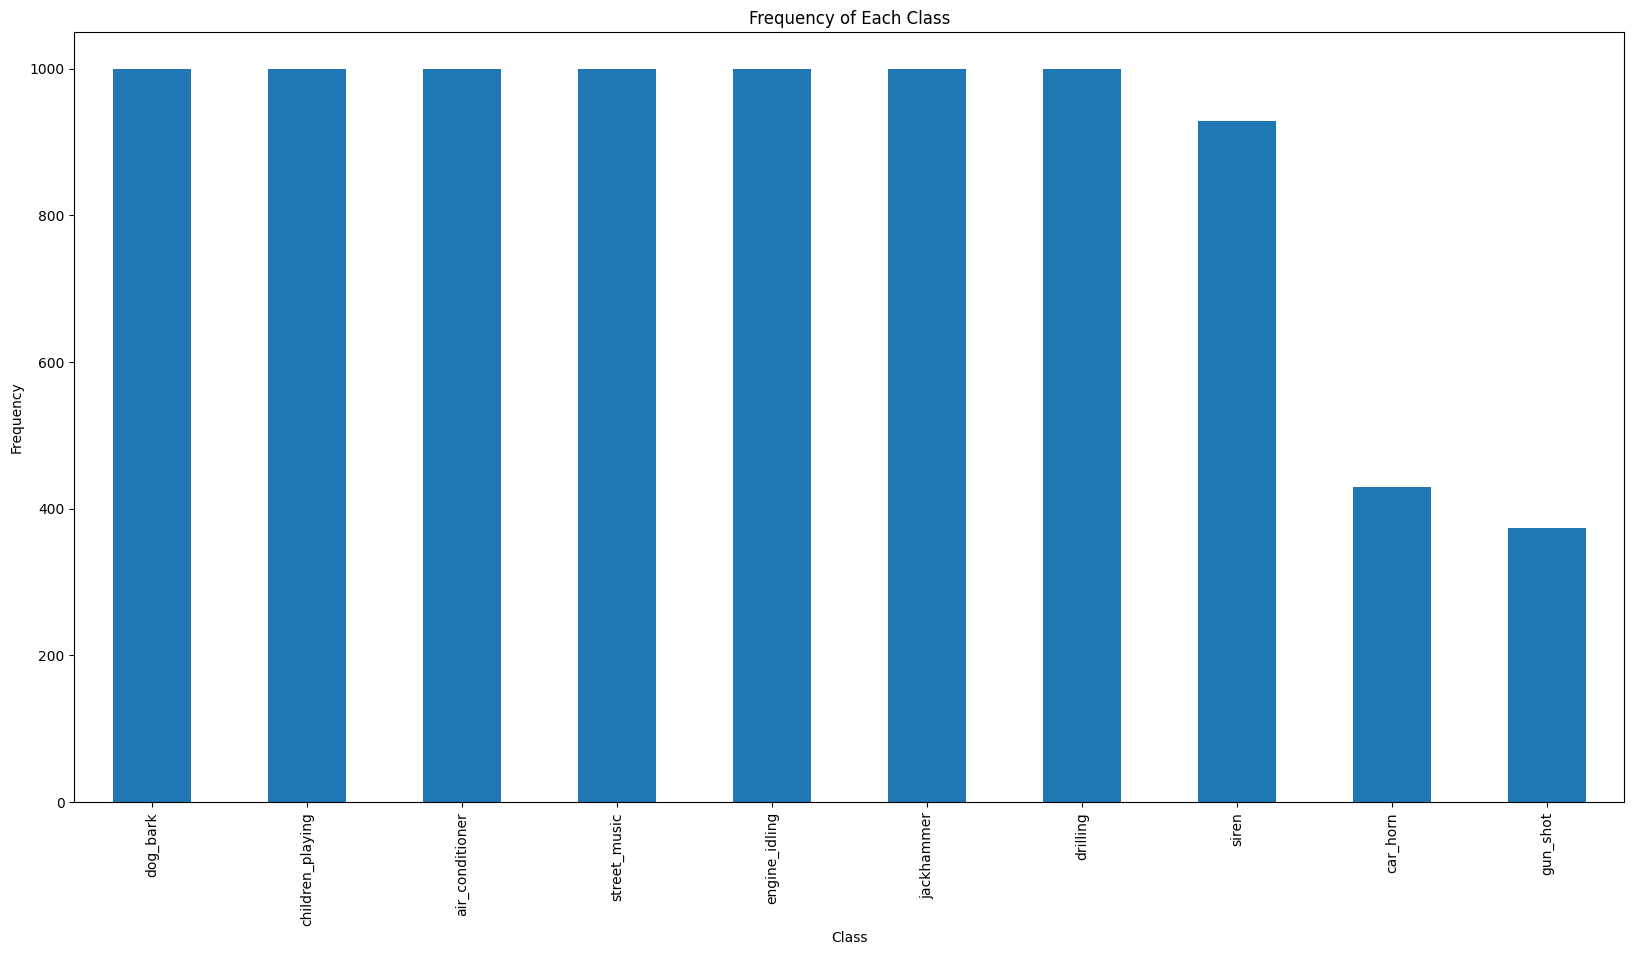

In [8]:
class_frequency.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(20, 10.)
fig.savefig('histogrammeclass', dpi=100)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class')
plt.show()


In [9]:
def display_waveform(audio_path, metadata, save_path=None):
    file_name = os.path.basename(audio_path)
    row = metadata[metadata['slice_file_name'] == file_name]
    if not row.empty:
        class_name = row['class'].values[0]
        y, sr = librosa.load(audio_path)
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f'Waveform - Class: {class_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        if save_path is not None:
            plt.savefig(save_path, dpi=400)
        else:
            plt.show()
    else:
        print(f"No matching entry found in metadata for file: {file_name}")

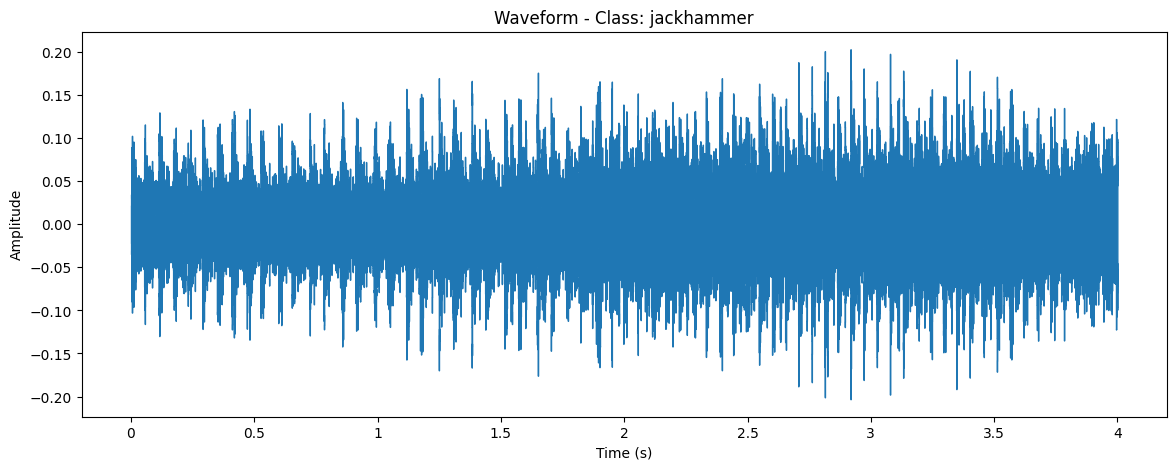

In [10]:
display_waveform('data/fold1/103074-7-4-1.wav', metadata, 'waveform.png')

In [11]:
def display_spectrogram(audio_path,metadata, save_path=None):
    file_name = os.path.basename(audio_path)
    row = metadata[metadata['slice_file_name'] == file_name]
    if not row.empty:
        class_name = row['class'].values[0]
        y, sr = librosa.load(audio_path, sr=None)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', vmin=-80, vmax=0)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram - Class: {class_name}')
        if save_path is not None:
            plt.savefig(save_path, dpi=400)
        else:
            plt.show()
    else:
        print(f"No matching entry found in metadata for file: {file_name}")

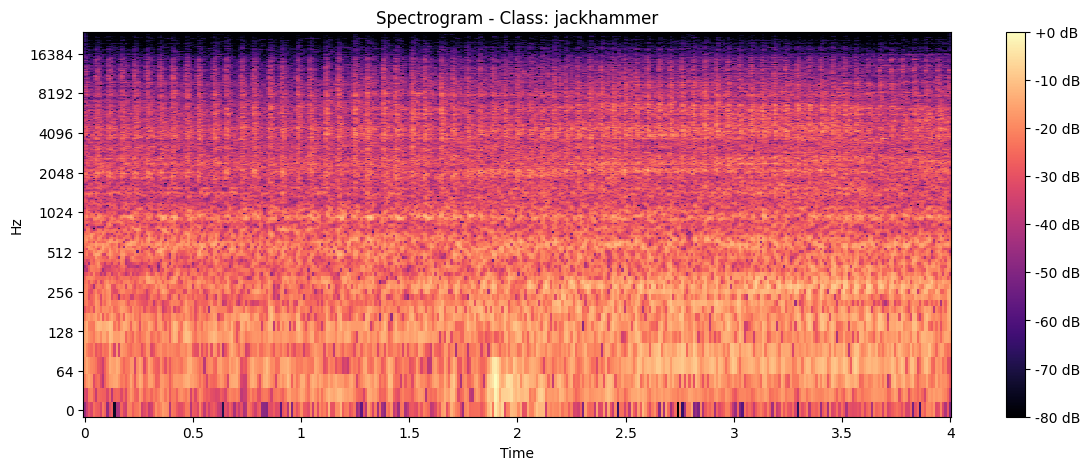

In [12]:
display_spectrogram('data/fold1/103074-7-4-1.wav',metadata,'spectogram')

In [1]:
def display_log_mel_spectrogram(audio_path,metadata, save_path=None):
    file_name = os.path.basename(audio_path)
    row = metadata[metadata['slice_file_name'] == file_name]
    if not row.empty:
        class_name = row['class'].values[0]
        y, sr = librosa.load(audio_path, sr=None)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=50)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Log-mel Spectrogram - Class: {class_name}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')

        if save_path is not None:
            plt.savefig(save_path, dpi=400)
        else:
            plt.show() 
    else:
        print(f"No matching entry found in metadata for file: {file_name}")

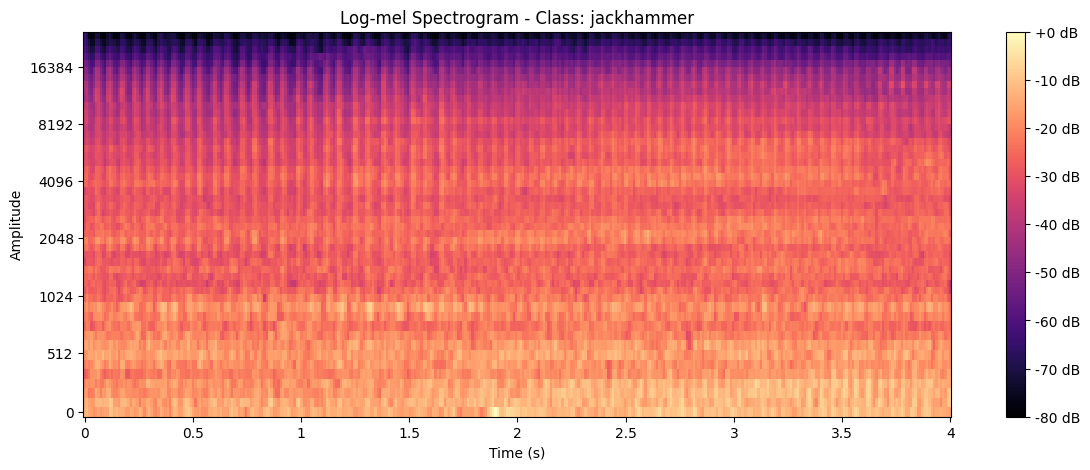

In [6]:
display_log_mel_spectrogram('data/fold1/103074-7-4-1.wav',metadata,'log-melspectogram')

In [15]:
folds = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [16]:
def extract_mfcc(audio_path, n_mfcc=20, n_fft=1024, hop_length=1024):
    y, sr = librosa.load(audio_path,sr=None,mono=True)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs

In [17]:
extract_mfcc('data/fold1/40722-8-0-0.wav')

array([[-1.73181946e+02, -1.28913147e+02, -1.65771347e+02,
        -1.15151649e+02, -1.36586716e+02, -9.74851685e+01,
        -1.87671616e+02, -1.59941254e+02, -1.29797455e+02,
        -1.65812836e+02, -1.75192108e+02, -1.31953812e+02,
        -1.48301590e+02, -1.40257874e+02, -7.63643570e+01,
        -1.42482254e+02, -1.38100098e+02, -7.95547714e+01,
        -1.29583054e+02, -9.54267349e+01, -9.34402313e+01,
        -1.07317780e+02, -8.77391281e+01, -3.64531822e+01,
        -8.42908325e+01, -8.71665039e+01, -9.01503372e+01,
        -2.29888077e+02, -1.83968430e+02, -1.52168045e+02,
        -1.24054100e+02, -1.37145508e+02, -1.38370132e+02,
        -1.06481697e+02, -1.08615379e+02, -1.30834961e+02,
        -7.74652176e+01, -1.10841942e+02, -1.34549057e+02,
        -1.35364105e+02, -1.16513489e+02, -9.39333572e+01,
        -1.07854813e+02, -9.68152771e+01],
       [ 1.27908020e+02,  1.26173286e+02,  1.38886627e+02,
         1.05893356e+02,  1.36315628e+02,  7.19641418e+01,
         1.09

In [18]:
df=metadata


In [19]:

data=[]

for index, row in df.iterrows():
    file_name = os.path.join(os.path.abspath('../audio/data/'), 'fold' + str(row["fold"]), str(row['slice_file_name']))
    mfccs = extract_mfcc(file_name)
    mfccs_features = np.mean(mfccs.T,axis=0)
    class_label=row["class"]
    data.append([class_label,mfccs_features])
    

c:\Users\User\Desktop\audio\urbansounds\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [20]:
data=pd.DataFrame(data,columns=['class','features'])
data.head()

,class,features
0,dog_bark,"[-354.73712, 123.179955, -96.368, -64.2246, -4..."
1,children_playing,"[-572.937, 183.66045, -86.334755, 48.45476, 9...."
2,children_playing,"[-604.51624, 186.79129, -71.30112, 40.52151, 8..."
3,children_playing,"[-548.6726, 160.92863, -61.672333, 50.7262, 0...."
4,children_playing,"[-593.837, 183.6843, -82.122345, 45.518246, 12..."


In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_classes = onehot_encoder.fit_transform(data[['class']])
encoded_classes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
data_encoded = pd.concat([data[['features']], pd.DataFrame(encoded_classes, columns=onehot_encoder.get_feature_names_out(['class']))], axis=1)
data_encoded.head()

,features,class_air_conditioner,class_car_horn,class_children_playing,class_dog_bark,class_drilling,class_engine_idling,class_gun_shot,class_jackhammer,class_siren,class_street_music
0,"[-354.73712, 123.179955, -96.368, -64.2246, -4...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[-572.937, 183.66045, -86.334755, 48.45476, 9....",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[-604.51624, 186.79129, -71.30112, 40.52151, 8...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[-548.6726, 160.92863, -61.672333, 50.7262, 0....",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[-593.837, 183.6843, -82.122345, 45.518246, 12...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_encoded = np.array(data_encoded['features'].tolist())
y_encoded = encoded_classes

In [24]:
data_encoded['fold'] = df['fold']

In [25]:
data_encoded.head()

,features,class_air_conditioner,class_car_horn,class_children_playing,class_dog_bark,class_drilling,class_engine_idling,class_gun_shot,class_jackhammer,class_siren,class_street_music,fold
0,"[-354.73712, 123.179955, -96.368, -64.2246, -4...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,"[-572.937, 183.66045, -86.334755, 48.45476, 9....",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,"[-604.51624, 186.79129, -71.30112, 40.52151, 8...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,"[-548.6726, 160.92863, -61.672333, 50.7262, 0....",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,"[-593.837, 183.6843, -82.122345, 45.518246, 12...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [26]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
all_accuracies = []

In [27]:
# paper model translated
def get_model():
  #forming model
  model=Sequential()

  #adding layers and forming the model
  model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(36, 5, 1)))
  model.add(MaxPooling2D(padding="same"))

  model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
  model.add(MaxPooling2D(padding="same"))
  model.add(Dropout(0.3))

  model.add(Flatten())

  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.4))

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(0.4))

  model.add(Dense(10,activation="softmax"))

  #compiling
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

  return model

In [ ]:
for fold_index in range(1, 11):